In [ ]:
# Check to see if geopandas is already loaded into your Colab environment: will return True or False
import sys
'geopandas' in sys.modules

False

In [ ]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon

     |████████████████████████████████| 1.0MB 2.7MB/s 
     |████████████████████████████████| 15.3MB 234kB/s 
     |████████████████████████████████| 6.6MB 36.3MB/s 
     |████████████████████████████████| 2.0MB 2.9MB/s 
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [24]:
url = 'https://www.gutenberg.org/files/52790/52790-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:120]}')

<class 'str'>, 
141624, 
﻿The Project Gutenberg EBook of History of a Six Weeks' Tour, by
Mary Wollstonecraft Shelley and Percy Bysshe Shelley



In [25]:
places = GeoText(raw)
cities = list(places.cities)
cities #Calling this shows my list of cities. You could also use print(cities)

['Holland',
 'Geneva',
 'Dover',
 'Calais',
 'Calais',
 'Calais',
 'Calais',
 'Calais',
 'Calais',
 'Paris',
 'Paris',
 'Paris',
 'Roman',
 'Paris',
 'Paris',
 'Moscow',
 'Troyes',
 'Troyes',
 'Troyes',
 'Troyes',
 'Chaumont',
 'Besançon',
 'Troyes',
 'Besançon',
 'Troyes',
 'Paris',
 'Most',
 'Jerusalem',
 'London',
 'Paris',
 'Most',
 'Holland',
 'Bonn',
 'Rotterdam',
 'Holland',
 'Rotterdam',
 'Rotterdam',
 'Gravesend',
 'Geneva',
 'Paris',
 'Paris',
 'Paris',
 'Troyes',
 'Troyes',
 'Geneva',
 'Dijon',
 'Paris',
 'Paris',
 'Geneva',
 'Geneva',
 'London',
 'Geneva',
 'Geneva',
 'Most',
 'Groves',
 'Lausanne',
 'Lausanne',
 'Lausanne',
 'Geneva',
 'Cluses',
 'Cluses',
 'Martin',
 'Sallanches',
 'Martin',
 'Martin',
 'Keswick',
 'Cluses',
 'Martin',
 'Turin',
 'Martin',
 'Keswick',
 'Clifton',
 'Of',
 'Of',
 'Of',
 'Of',
 'Of',
 'Of',
 'Of',
 'Of',
 'Of',
 'Of',
 'Mission',
 'Fairbanks',
 'Fairbanks',
 'Salt',
 'Most']

In [26]:
geolocator = Nominatim(user_agent='YOURNAME@YOUREMAIL', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.

lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon

[Location(Nederland, (52.5001698, 5.7480821, 0.0)),
 Location(Genève, Grand Genève, Genève, Schweiz/Suisse/Svizzera/Svizra, (46.2017559, 6.1466014, 0.0)),
 Location(Dover, Kent, South East England, England, United Kingdom, (51.1251275, 1.3134228, 0.0)),
 Location(Calais, Pas-de-Calais, Hauts-de-France, France métropolitaine, 62100, France, (50.9524769, 1.8538446, 0.0)),
 Location(Calais, Pas-de-Calais, Hauts-de-France, France métropolitaine, 62100, France, (50.9524769, 1.8538446, 0.0)),
 Location(Calais, Pas-de-Calais, Hauts-de-France, France métropolitaine, 62100, France, (50.9524769, 1.8538446, 0.0)),
 Location(Calais, Pas-de-Calais, Hauts-de-France, France métropolitaine, 62100, France, (50.9524769, 1.8538446, 0.0)),
 Location(Calais, Pas-de-Calais, Hauts-de-France, France métropolitaine, 62100, France, (50.9524769, 1.8538446, 0.0)),
 Location(Calais, Pas-de-Calais, Hauts-de-France, France métropolitaine, 62100, France, (50.9524769, 1.8538446, 0.0)),
 Location(Paris, Île-de-France, 

In [27]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,Nederland,"(52.5001698, 5.7480821)"
1,"Genève, Grand Genève, Genève, Schweiz/Suisse/S...","(46.2017559, 6.1466014)"
2,"Dover, Kent, South East England, England, Unit...","(51.1251275, 1.3134228)"
3,"Calais, Pas-de-Calais, Hauts-de-France, France...","(50.9524769, 1.8538446)"
4,"Calais, Pas-de-Calais, Hauts-de-France, France...","(50.9524769, 1.8538446)"
5,"Calais, Pas-de-Calais, Hauts-de-France, France...","(50.9524769, 1.8538446)"
6,"Calais, Pas-de-Calais, Hauts-de-France, France...","(50.9524769, 1.8538446)"


In [28]:
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

In [29]:
# coordinate system we're using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,City Name,Coordinates,geometry
0,Nederland,"(52.5001698, 5.7480821)",POINT (5.74808 52.50017)
1,"Genève, Grand Genève, Genève, Schweiz/Suisse/S...","(46.2017559, 6.1466014)",POINT (6.14660 46.20176)
2,"Dover, Kent, South East England, England, Unit...","(51.1251275, 1.3134228)",POINT (1.31342 51.12513)
3,"Calais, Pas-de-Calais, Hauts-de-France, France...","(50.9524769, 1.8538446)",POINT (1.85384 50.95248)
4,"Calais, Pas-de-Calais, Hauts-de-France, France...","(50.9524769, 1.8538446)",POINT (1.85384 50.95248)


In [30]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.cpg to Countries_WGS84 (1).cpg
Saving Countries_WGS84.dbf to Countries_WGS84 (1).dbf
Saving Countries_WGS84.prj to Countries_WGS84 (1).prj
Saving Countries_WGS84.shp to Countries_WGS84 (1).shp
Saving Countries_WGS84.shx to Countries_WGS84 (1).shx


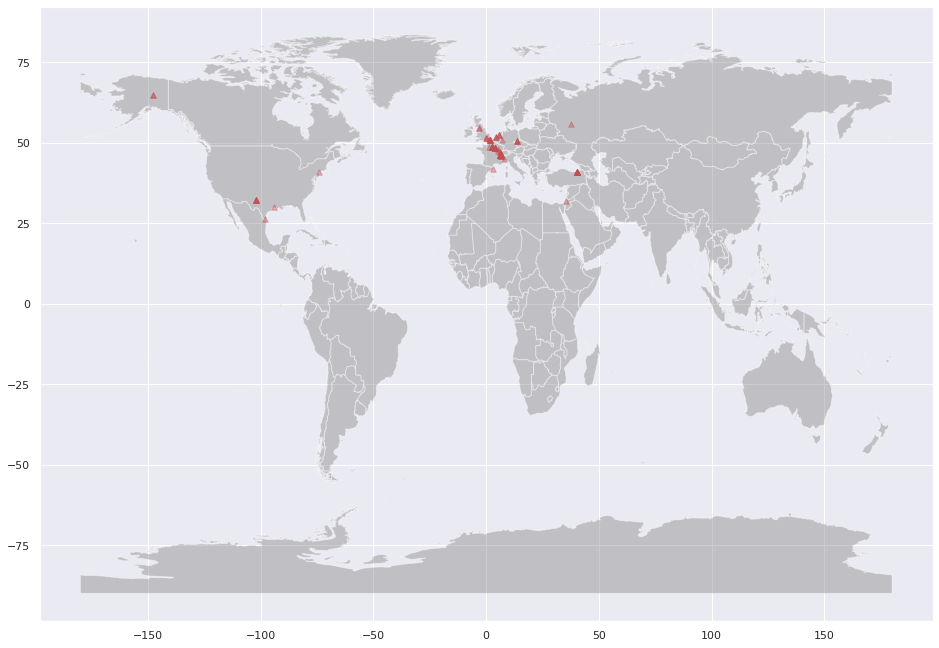

In [31]:
# world map .shp file we down/uploaded
countries_map = gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

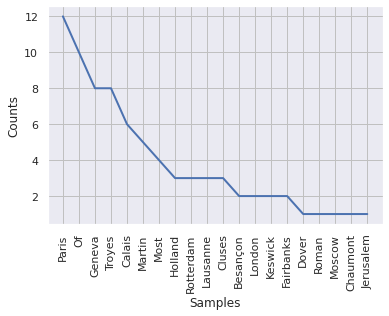

In [32]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20

In [33]:
#import required libraries, packages, etc.
import folium
from folium import plugins
import json

In [34]:
# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("TwainCities.geojson", driver='GeoJSON')

# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
TwainMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

folium.GeoJson("TwainCities.geojson").add_to(TwainMap)

# Display your map   
TwainMap